In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
iris = datasets.load_iris()

In [2]:
x=iris.data[:,:2]
y = iris.target

df=pd.DataFrame(x,columns=['x1','x2'])

Text(0, 0.5, 'Sepal width')

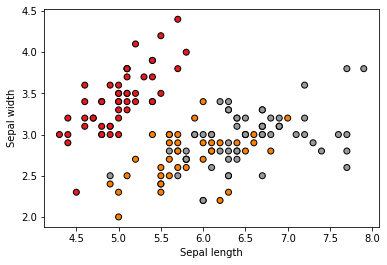

In [3]:

plt.scatter(x[:, 0], x[: ,1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


In [4]:
k=3

In [5]:
init_centroids = df.sample(3)
init_centroids

,x1,x2
41,4.5,2.3
81,5.5,2.4
131,7.9,3.8


In [6]:
centroids=[]
centroids.append(init_centroids)
centroids = np.array(centroids)
centroids

array([[[4.5, 2.3],
        [5.5, 2.4],
        [7.9, 3.8]]])

In [7]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [8]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [9]:
get_centroids = findClosestCentroids(centroids, x)

In [10]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

[0    5.6
1    4.3
dtype: float64, 0    5.846622
1    3.040541
dtype: float64]


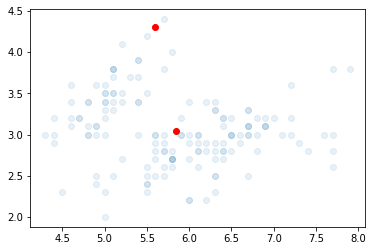

[0    5.26875
1    3.85000
dtype: float64, 0    5.911940
1    2.962687
dtype: float64]


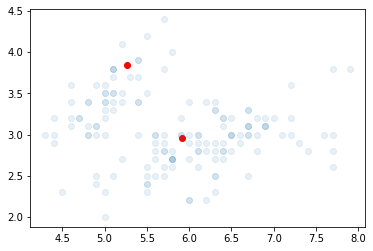

[0    5.016327
1    3.451020
dtype: float64, 0    6.244554
1    2.866337
dtype: float64]


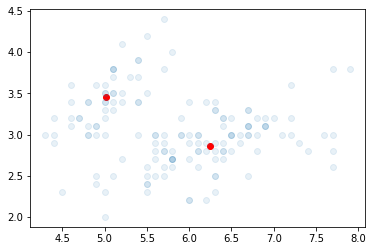

[0    5.014035
1    3.312281
dtype: float64, 0    6.351613
1    2.901075
dtype: float64]


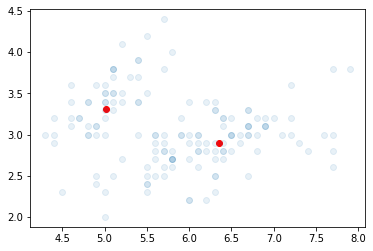

[0    5.050820
1    3.283607
dtype: float64, 0    6.386517
1    2.902247
dtype: float64]


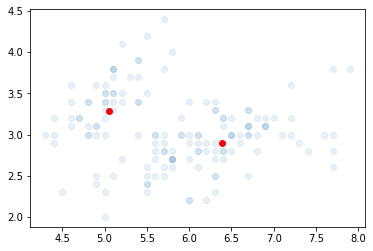

[0    5.087879
1    3.228788
dtype: float64, 0    6.436905
1    2.922619
dtype: float64]


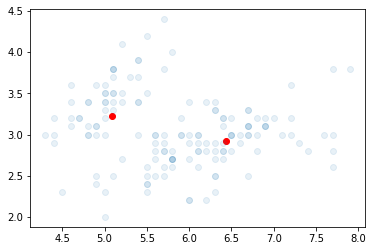

[0    5.118571
1    3.197143
dtype: float64, 0    6.4775
1    2.9350
dtype: float64]


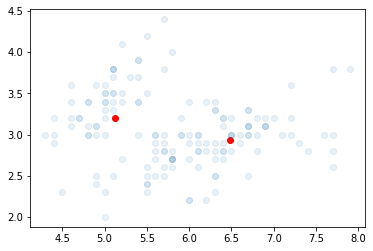

[0    5.142466
1    3.178082
dtype: float64, 0    6.507792
1    2.942857
dtype: float64]


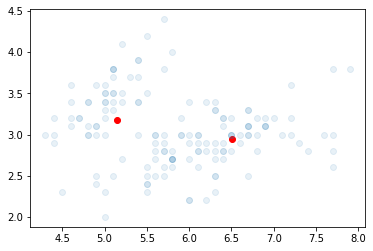

[0    5.150000
1    3.168919
dtype: float64, 0    6.518421
1    2.948684
dtype: float64]


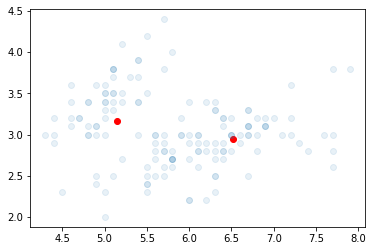

[0    5.150000
1    3.168919
dtype: float64, 0    6.518421
1    2.948684
dtype: float64]


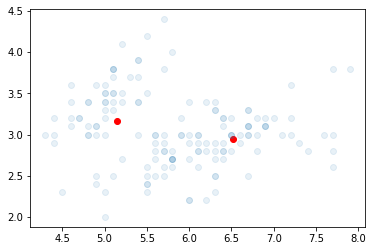

In [11]:
for i in range(10):
    get_centroids = findClosestCentroids(centroids, x)
    centroids = calc_centroids(get_centroids, x)
    print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='red')
    plt.scatter(x[:, 0], x[:, 1], alpha=0.1)
    plt.show()